UNIDAD 10 - Dataframes con pandas   

1. Cargue el dataset

In [1379]:
import pandas as pd
import matplotlib
df = pd.read_json("https://www.datos.gov.co/resource/32sa-8pi3.json")
df=df.dropna()
df.head() #Ver la data

,valor,unidad,vigenciadesde,vigenciahasta
0,4761.64,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
1,4781.28,COP,2022-12-20T00:00:00.000,2022-12-20T00:00:00.000
2,4802.48,COP,2022-12-17T00:00:00.000,2022-12-19T00:00:00.000
3,4836.24,COP,2022-12-13T00:00:00.000,2022-12-13T00:00:00.000
4,4815.99,COP,2022-12-10T00:00:00.000,2022-12-12T00:00:00.000


In [1380]:
df.info() # Analizar el data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          1000 non-null   float64
 1   unidad         1000 non-null   object 
 2   vigenciadesde  1000 non-null   object 
 3   vigenciahasta  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


Como se puede analizar solo la columna valor es de tipo numérico, es por ello que los calculos solo se realizarán sobre ella

2. Calculos

Para realizar este ejercicio se utilizan los módulos incluidos en pandas como "mean", "max" y "std" entre otros. Notar que se selecciona la columna valor, de no ser así arroja un error ya que el resto de la información no es numérica

3. Presentar el resumen de los datos numéricos

In [1381]:
print("Resumen de calculos")
print("La media del TRM es: "+str(df["valor"].mean().__round__(3))) 
print("La mediana del TRM es: "+str(df["valor"].median().__round__(3)))
print("La desviación estandar de la TRM es: "+str(df["valor"].std().__round__(3)))
print("El máximo de la media para la TRM es: "+str(df["valor"].max().__round__(3)))
print("El mínimo del TRM es: "+str(df["valor"].min().__round__(3)))
print("El rango del TRM es: "+str((df["valor"].max()-df["valor"].min()).__round__(3)))

Resumen de calculos
La media del TRM es: 3042.377
La mediana del TRM es: 2972.525
La desviación estandar de la TRM es: 730.689
El máximo de la media para la TRM es: 5061.21
El mínimo del TRM es: 1846.12
El rango del TRM es: 3215.09


4 Información general del dataset

In [1382]:
df.describe() #Descripción de la columna "valor" con el modulo "describe" de pandas

,valor
count,1000.000000
mean,3042.376510
std,730.689006
min,1846.120000
25%,2500.497500
50%,2972.525000
75%,3646.340000
max,5061.210000


5 Representaciones graficas de la información

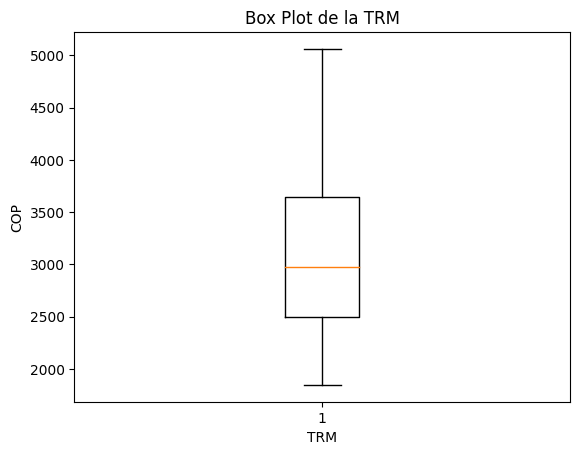

In [1383]:
import matplotlib.pyplot as plt

data = df["valor"]

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_title('Box Plot de la TRM')
ax.set_xlabel('TRM')
ax.set_ylabel('COP')

plt.show()

Analisis

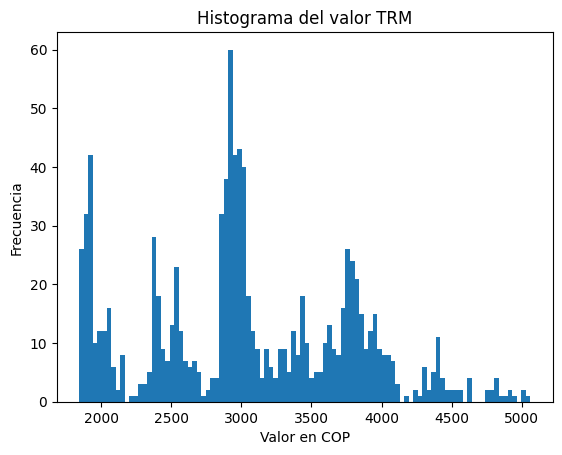

In [1384]:
data = df["valor"]

fig, ax = plt.subplots()
ax.hist(data, bins=100)

ax.set_title('Histograma del valor TRM')
ax.set_xlabel('Valor en COP')
ax.set_ylabel('Frecuencia')

plt.show()

Análisis

In [1385]:
from sodapy import Socrata
client = Socrata('www.datos.gov.co', None)
results = client.get('kgxf-xxbe')
datos = pd.DataFrame(results)
datos=datos.dropna()
datos.describe()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,443,443,443,443,443,443,443,443,443,443,...,443,443,443,443,443,443,443,443,443,443
unique,12,3,376,2,2,3,4,361,362,29,...,2,2,2,5,57,58,52,47,47,154
top,20194,TI,SB11201940464873,URBANO,N,A,ACADÉMICO,141016000305,111001018058,11,...,Si,Si,Si,A-,49,47,47,43,47,185
freq,126,368,2,391,436,429,209,3,3,70,...,255,233,321,205,24,23,26,23,26,10


- Comparación colegio bilingüe y puntaje inglés

In [1386]:
biling_punt_ing=datos[["cole_bilingue","punt_ingles"]]

biling_punt_ing.loc[:,"punt_ingles"]=biling_punt_ing.loc[:,"punt_ingles"].astype(int)
biling_punt_ing.groupby("cole_bilingue").mean()

,punt_ingles
cole_bilingue,
N,49.646789
S,74.428571


Mirando los datos uno podría concluir que los estudiantes de colegios bilingüe tienden a un mejor puntaje en la parte de inglés

In [1387]:
biling_punt_ing.groupby("cole_bilingue").size()


cole_bilingue
N    436
S      7
dtype: int64

Pero luego de revisar los datos, no sería correcto afirmarlo ya que la muestra de los estudiantes de colegios bilingüe es muy pequeña para considerarse representativa.

- Comparación puntaje globar y acceso a computador familiar

In [1388]:
compu_global=datos[["fami_tienecomputador","punt_global"]]

compu_global.loc[:,"punt_global"]=compu_global.loc[:,"punt_global"].astype(int)
compu_global.groupby("fami_tienecomputador").mean()


,punt_global
fami_tienecomputador,
No,239.542553
Si,263.32549


<Axes: ylabel='Frequency'>

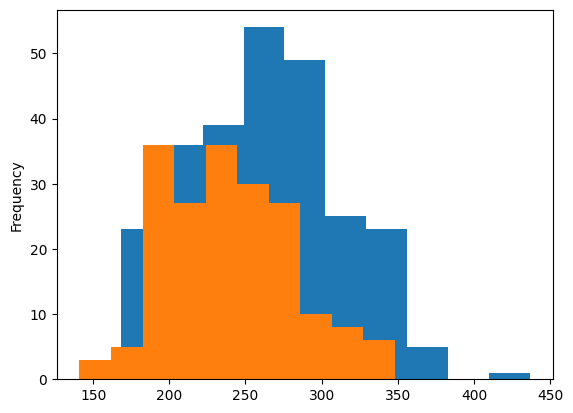

In [1389]:
compu_global_mask=compu_global["fami_tienecomputador"]=="Si"
compu_global[compu_global_mask]["punt_global"].plot(kind='hist')
compu_global[~compu_global_mask]["punt_global"].plot(kind='hist')

Análisis